In [199]:
import numpy as np
import pandas as pd
import cPickle as pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analysis and Results
Laying groundwork to share the methods we used for model selection and parameter tuning.  All accuracy scores will be from cross-validation data.  

##Loading data
First list all of the parameter variations we were considering.

In [200]:
class MajorityClassifier:
    def fit(self,X_train,y_train):
        '''
        Takes training features and labels and outputs majority
        Classifier will predict the training majority every time
        '''
        y_df = pd.Series(y_train)
        counts = y_df.value_counts()
        self.majority=counts[counts==max(counts)].index[0]
        
    def predict(self,X_test):
        return [self.majority] * X_test.shape[0]

In [211]:
y_train

NameError: name 'y_train' is not defined

In [202]:
import os  
logs = []
mydir = "../results"
for fn in os.listdir(mydir):
    if 'pkl' in fn:
        print fn
        log = pickle.load(open( mydir + "/" + fn, "rb" ))
        logs = logs + log

model_results.pkl.20150506-214606
model_results.pkl.20150506-220322
model_results.pkl.20150506-230312
model_results.pkl.20150506-230501.min_required_count.100.l1svc.accuracy
model_results.pkl.20150506-230633.min_required_count.100.chi2.accuracy
model_results.pkl.20150506-230739.min_required_count.50.chi2.accuracy
model_results.pkl.20150506-234806.20150506-234806.min_required_count.20.chi2.accuracy
model_results.pkl.20150506-235021.20150506-235021.min_required_count.20.chi2.accuracy
model_results.pkl.20150506-235051.20150506-235051.min_required_count.20.chi2.accuracy
model_results.pkl.20150506-235230.20150506-235230.min_required_count.20.chi2.accuracy
model_results.pkl.20150506-235413.20150506-235413.min_required_count.20.chi2.accuracy
model_results.pkl.20150506-235434.20150506-235434.min_required_count.20.chi2.accuracy
model_results.pkl.20150509-052203.20150509-052203.min_required_count.100.chi2.accuracy.geniss
model_results.pkl.20150509-113912.20150509-113912.min_required_count.1000.c

In [205]:
df = pd.DataFrame.from_dict(logs)
df['num_opinion_shards']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
41   NaN
42   NaN
43   NaN
44   NaN
45   NaN
46   NaN
47    10
48    10
49    10
50    10
51    10
52    10
53    10
54    10
55    10
56    10
Name: num_opinion_shards, Length: 57, dtype: float64

Seaborn Settings

In [97]:
font_size = {
    'paper':8,
    'poster':16,
    'notebook':10,
    'talk':13
}
CONTEXT='notebook'

##Identify the best performance of each model
After tuning parameters

In [194]:
def identify_best_of_each_model(df,metric):
    baseline_scores = {'best_score':'train_accuracy','test_accuracy':'test_accuracy'}
    score_list = []
    models = df['model'].unique()
    for model in models:
        df2 = df.loc[df['model']==model]
        print "Best values for each model:"
        if model=='baseline':
            best_score=max(df2[baseline_scores[metric]])
            print df2.loc[df2[baseline_scores[metric]]==best_score,('model','best_params')].values
        else:
            best_score = max(df2[metric])
            print df2.loc[df2[metric]==best_score,('model','best_params')].values
        score_list.append(best_score)
        
        
    return models,score_list

identify_best_of_each_model(df,'best_score')

[['baseline' nan]
 ['baseline' nan]
 ['baseline' nan]
 ['baseline' nan]]
[['logistic' {'classifier__C': 1, 'feature_reduction__alpha': 1.0}]]
[['svm' {'classifier__C': 0.1, 'feature_reduction__alpha': 1.0}]]
[['naive_bayes' {'feature_reduction__alpha': 0.8}]]
[['bernoulli_bayes'
  {'classifier__binarize': 0.1, 'feature_reduction__alpha': 0.4}]]


(array(['baseline', 'logistic', 'svm', 'naive_bayes', 'bernoulli_bayes'], dtype=object),
 [0.48719717217001468,
  0.5601953601953602,
  0.56043956043956045,
  0.54056384171049232,
  0.54090354090354087])

[['baseline' nan]
 ['baseline' nan]
 ['baseline' nan]
 ['baseline' nan]]
[['logistic' {'classifier__C': 1, 'feature_reduction__alpha': 1.0}]]
[['svm' {'classifier__C': 0.1, 'feature_reduction__alpha': 1.0}]]
[['naive_bayes' {'feature_reduction__alpha': 0.8}]]
[['bernoulli_bayes'
  {'classifier__binarize': 0.1, 'feature_reduction__alpha': 0.4}]]


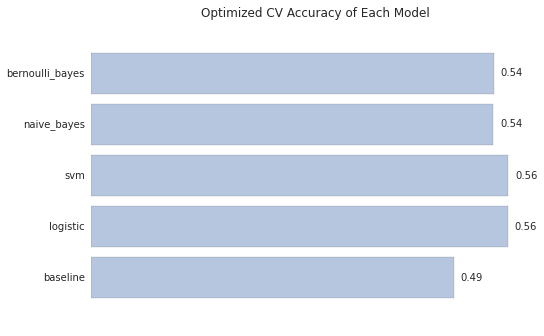

In [195]:
def best_model_accuracy_bars(df,metric,context):
    '''
    df: data frame
    context: paper,talk, notebook, poster
    '''
    
    sns.set_context(context)
    model_list,score_list = identify_best_of_each_model(df,metric)
    
    #size and position of bars
    bar_pos = np.arange(len(model_list))
    bar_size = score_list
    bar_labels = model_list
    
    #plot
    plt.barh(bar_pos,bar_size, align='center', alpha=0.4)
    plt.yticks(bar_pos, bar_labels)
    plt.xticks([],[]) #no x-axis

    #Add data labels
    for x,y in zip(bar_size,bar_pos):
        plt.text(x+0.01, y, '%.2f' % x, ha='left', va='center',fontsize=font_size[context])
        
    pretty_metric = {'test_accuracy':'Test','best_score':'CV'}
    plt.title('Optimized %s Accuracy of Each Model' % pretty_metric[metric])
    plt.show()

best_model_accuracy_bars(df,'best_score',CONTEXT)

[['baseline' nan]
 ['baseline' nan]
 ['baseline' nan]
 ['baseline' nan]]
[['logistic' {'classifier__C': 1, 'feature_reduction__alpha': 0.8}]
 ['logistic' {'classifier__C': 1, 'feature_reduction__alpha': 0.8}]]
[['svm' {'classifier__C': 0.1, 'feature_reduction__alpha': 1.0}]
 ['svm' {'classifier__C': 0.1, 'feature_reduction__alpha': 1.0}]]
[['naive_bayes' {'feature_reduction__alpha': 0.8}]
 ['naive_bayes' {'feature_reduction__alpha': 0.8}]]
[['bernoulli_bayes'
  {'classifier__binarize': 0.1, 'feature_reduction__C': 0.1}]]


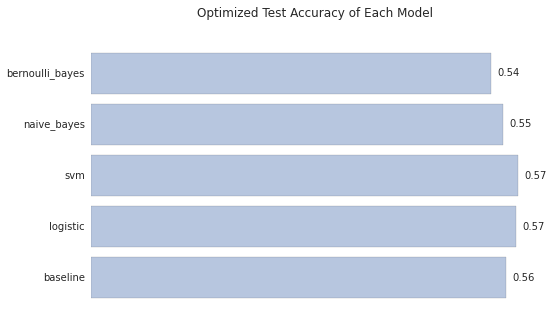

In [196]:
best_model_accuracy_bars(df,'test_accuracy',CONTEXT)

##Parameter Tuning
Show how we arrived at the best model with the best parameters, by demonstrating model accuracy at various parameter levels for various models

In [93]:
def accuracy_by_reg_parameter(raw_df,context,xscale):
    df = raw_df.loc[:,('model','grid_scores')]
    #print df
    sns.set_context(context)
    models = df['model'].unique()
    for model in models:
        if model!='baseline':
            grid = df.loc[df['model']==model,'grid_scores'].values
            print grid[0][0]
            foo = dict((y, x) for x, y in grid[0][0])
            print foo
            #x=gm.loc[model,:].index.tolist()
            #y=gm.loc[model,'accuracy'].tolist()
            #plt.plot(x,y,label=model)
        
    #plt.xscale(xscale)
    #plt.title('Model Accuracy, varying %s' %parameter)
    #plt.legend()

XSCALE='linear'

In [94]:
accuracy_by_reg_parameter(df,CONTEXT,XSCALE)

mean: 0.44297, std: 0.00015, params: {'classifier__C': 0.01}


ValueError: need more than 1 value to unpack

In [158]:
def accuracy_by_parameter(raw_df,parameter,context,xscale):
    df = raw_df.loc[:,('model',parameter,'best_score')]
    grouped = df.groupby(['model',parameter])
    gm = grouped.max()
    
    return df
'''
    sns.set_context(context)
    models = df['model'].unique()
    for model in models:
        if model!='baseline':
            x=gm.loc[model,:].index.tolist()
            y=gm.loc[model,'accuracy'].tolist()
            plt.plot(x,y,label=model)
        
    plt.xscale(xscale)
    plt.title('Model Accuracy, varying %s' %parameter)
    plt.legend()
'''
XSCALE='linear'

In [161]:
accuracy_by_parameter(df,'num_features',CONTEXT,XSCALE)

,model,num_features,best_score
0,baseline,11009,NaN
1,logistic,11009,0.521863
2,svm,11009,0.520913
3,naive_bayes,11009,0.504753
4,bernoulli_bayes,11009,0.514259
5,baseline,11009,NaN
6,logistic,11009,0.521863
7,svm,11009,0.520913
8,naive_bayes,11009,0.504753
9,bernoulli_bayes,11009,0.514259


##TODO: show this one

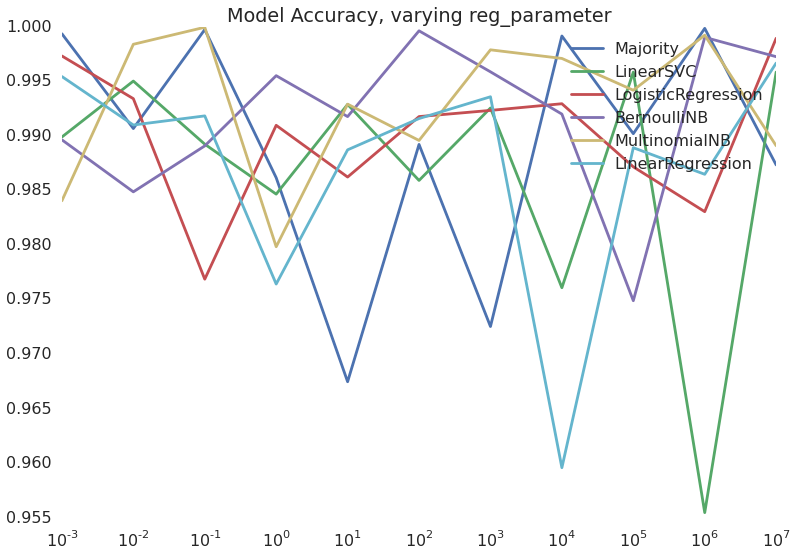

In [199]:
accuracy_by_parameter('reg_parameter',CONTEXT,'log')

#TODO:
1. have log_results return information within the fitted_model
1. rebalance training set
1. eliminate mixed/unknown opinions
- ROC curves for liberal, conservative vs. mixed
- Performance for just liberal vs conservative, with mixed removed
- Grouped Bar chart, displaying TFIDF vs count
- make into python file
- write the intro and methods
- start running and logging models
- follow Kush's recommendations
- buy poster board


##RESULTS
- test accuracy of best model on test data
- Display list of most influential/predictive/common words, either as a sorted bar chart or word cloud
- Get examples of words in context for spot-checking.  Map back to actual essays.  

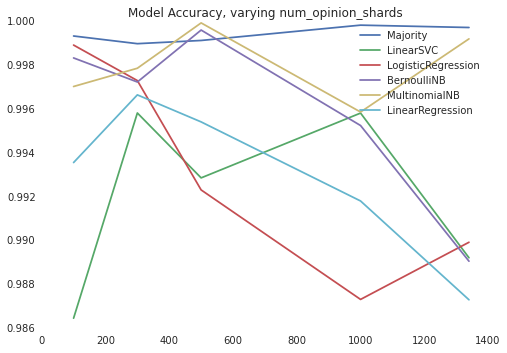

In [195]:
accuracy_by_parameter('num_opinion_shards',CONTEXT,XSCALE)

In [209]:
x =np.array([])
x.shape[0]

0